# TITANIC DATA

Sumber dataset : https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv

Merupakan tahap eksplorasi data yang mencakup preprocessing, dimana data yg dieksplor tersebut akan bersih dari Null Values.
- Tujuan dari eksplorasi data ini ialah untuk mengetahui pola dari passenger yang selamat.
- Eksplorasi data ini akan dilakukan dalam beberapa tahapan.

## FEATURE DESCRIPTION

- survived = Survival (0 = No, 1 = Yes)
- pclass = Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
- sex = Gender (male/female)
- age = Age in years
- fare = Passenger fare
- embarked = Port of Embarkation ( C = Cherbourg, Q = Queenstown, S = Southampton )
- class = the class (first, second, third)
- who = (man, woman, child)
- adult_male = adult male (True / False)
- deck = the deck
- embarked_town = Port of Embarkation (Cherbourg, Queenstown, Southampton )
- alive = wheter the passenger alive or not (yes/no)
- alone = wheter the passenger alone or not (True/False)

## IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

import scipy.stats as ss

## OVERVIEW

> 1. Load semua datanya

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv')

In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


> Diatas adalah 5 data teratas, dan 5 data terbawah pada dataframe ini. Dan di bawah ini adalah summary dari setiap features pada dataset ini.

In [5]:
pd.DataFrame({'dataFeatures' : df.columns, 'dataType' : df.dtypes.values, 
              'null' : [df[i].isna().sum() for i in df.columns],
              'nullPct' : [((df[i].isna().sum()/len(df[i]))*100).round(1) for i in df.columns],
              'Nunique' : [df[i].nunique() for i in df.columns],
              'uniqueSample' : [list(pd.Series(df[i].unique()).sample(2)) for i in df.columns]}).reset_index(drop = True)

,dataFeatures,dataType,null,nullPct,Nunique,uniqueSample
0,survived,int64,0,0.0,2,"[1, 0]"
1,pclass,int64,0,0.0,3,"[3, 1]"
2,sex,object,0,0.0,2,"[male, female]"
3,age,float64,177,19.9,88,"[39.0, 24.0]"
4,sibsp,int64,0,0.0,7,"[4, 3]"
5,parch,int64,0,0.0,7,"[6, 4]"
6,fare,float64,0,0.0,248,"[17.4, 25.925]"
7,embarked,object,2,0.2,3,"[Q, S]"
8,class,object,0,0.0,3,"[First, Third]"
9,who,object,0,0.0,3,"[child, woman]"


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [7]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## PREPROCESSING

> Terdapat Null values pada beberapa features.

In [8]:
# Data yg masih memiliki Null values
df.shape

(891, 15)

In [9]:
# Drop semua Null values
df.dropna().shape

(182, 15)

> Jumlah data setelah di drop jauh berbeda dengan sebelumnya. Maka dalam hal ini kita perlu melakukan identifikasi apakah data null tersebut termasuk kedalam MAR/MNAR/MCAR

In [10]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

> hasil identifikasi :
> - embarked termasuk kedalam MCAR
> - embark_town termasuk kedalam MCAR
> - age termasuk kedalam MAR
> - deck termasuk kedalam MAR

### Mengisi Null Values

#### embarked & embark_town

In [11]:
# menggunakan ffill untuk mengisi null values dengan row sebelumnya
df["embark_town"] = df["embark_town"].ffill()
df["embarked"] = df["embark_town"].ffill()

#### age

> melakukan proxy ke kolom Sex dan Pclass untuk mencari nilai kolom Age.

In [12]:
# melakukan filter null dan not null values
df_null = df[df["age"].isna()]
df_not_null = df[df["age"].notna()]

In [13]:
# menggunakan groupby untuk mengetahui nilai mean dari data yg tidak null
df_not_null.groupby(["sex", "pclass"], as_index = False)["age"].mean()

,sex,pclass,age
0,female,1,34.611765
1,female,2,28.722973
2,female,3,21.750000
3,male,1,41.281386
4,male,2,30.740707
5,male,3,26.507589


In [14]:
# memasukkan mean hasil kedalam data null
age = []
for sex, pclass in zip(df_null["sex"], df_null["pclass"]):
    if sex == "female":
        if pclass == 1:
            age.append(35) # append nilai sesuai dengan kriteria
        elif pclass == 2:
            age.append(29)
        else:
            age.append(22)
    else :
        if pclass == 1:
            age.append(41) # append nilai sesuai dengan kriteria
        elif pclass == 2:
            age.append(31)
        else:
            age.append(27)

In [15]:
# masukkan hasil kedata (ignore error)
df_null["age"] = age

In [16]:
# cek hasil pengisian
df_null[(df_null["sex"] == "female") & (df_null["pclass"] == 1)]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
31,1,1,female,35,1,0,146.5208,Cherbourg,First,woman,False,B,Cherbourg,yes,False
166,1,1,female,35,0,1,55.0000,Southampton,First,woman,False,E,Southampton,yes,False
256,1,1,female,35,0,0,79.2000,Cherbourg,First,woman,False,NaN,Cherbourg,yes,True
306,1,1,female,35,0,0,110.8833,Cherbourg,First,woman,False,NaN,Cherbourg,yes,True
334,1,1,female,35,1,0,133.6500,Southampton,First,woman,False,NaN,Southampton,yes,False
375,1,1,female,35,1,0,82.1708,Cherbourg,First,woman,False,NaN,Cherbourg,yes,False
457,1,1,female,35,1,0,51.8625,Southampton,First,woman,False,D,Southampton,yes,False
669,1,1,female,35,1,0,52.0000,Southampton,First,woman,False,C,Southampton,yes,False
849,1,1,female,35,1,0,89.1042,Cherbourg,First,woman,False,C,Cherbourg,yes,False


In [17]:
# join kembali data dengan data null not null
df = pd.concat([df_not_null, df_null])

#### deck

> melakukan proxy ke kolom Sex dan Fare untuk mencari nilai kolom Deck.

In [18]:
# melakukan filter null dan not null values
df_null = df[df["deck"].isna()]
df_not_null = df[df["deck"].notna()]

In [19]:
# menggunakan groupby untuk mengetahui nilai mean dari data yg tidak null
df_not_null.groupby(["sex", "deck"], as_index = False)["fare"].mean()

,sex,deck,fare
0,female,A,39.600000
1,female,B,115.803085
2,female,C,117.226541
3,female,D,60.776628
4,female,E,56.414167
5,female,F,19.071660
6,female,G,13.581250
7,male,A,39.625593
8,male,B,110.404380
9,male,C,85.744141


In [20]:
# memasukkan hasil kedalam data null
deck = []
for sex, fare in zip(df_null["sex"], df_null["fare"]):
    if sex == "female":
        if fare <= 14:
            deck.append('G') # append nilai sesuai dengan kriteria
        elif (fare > 14 and fare <= 19):
            deck.append('F')
        elif (fare > 19 and fare <= 40):
            deck.append('A')
        elif (fare > 40 and fare <= 56):
            deck.append('E')
        elif (fare > 56 and fare <= 61):
            deck.append('D')
        elif (fare > 61 and fare <= 116):
            deck.append('B')
        else:
            deck.append('C')
    else :
        if fare <= 18:
            deck.append('F') # append nilai sesuai dengan kriteria
        elif (fare > 18 and fare <= 37):
            deck.append('E')
        elif (fare > 37 and fare <= 40):
            deck.append('A')
        elif (fare > 40 and fare <= 53):
            deck.append('D')
        elif (fare > 53 and fare <= 86):
            deck.append('C')
        else:
            deck.append('B')

In [21]:
# masukkan hasil kedata (ignore error)
df_null["deck"] = deck

In [22]:
# cek hasil pengisian
df_null[(df_null["sex"] == "female") & (df_null["deck"] == 'B')]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
290,1,1,female,26.0,0,0,78.8500,Southampton,First,woman,False,B,Southampton,yes,True
537,1,1,female,30.0,0,0,106.4250,Cherbourg,First,woman,False,B,Cherbourg,yes,True
615,1,2,female,24.0,1,2,65.0000,Southampton,Second,woman,False,B,Southampton,yes,False
754,1,2,female,48.0,1,2,65.0000,Southampton,Second,woman,False,B,Southampton,yes,False
180,0,3,female,22.0,8,2,69.5500,Southampton,Third,woman,False,B,Southampton,no,False
256,1,1,female,35.0,0,0,79.2000,Cherbourg,First,woman,False,B,Cherbourg,yes,True
306,1,1,female,35.0,0,0,110.8833,Cherbourg,First,woman,False,B,Cherbourg,yes,True
375,1,1,female,35.0,1,0,82.1708,Cherbourg,First,woman,False,B,Cherbourg,yes,False
792,0,3,female,22.0,8,2,69.5500,Southampton,Third,woman,False,B,Southampton,no,False
863,0,3,female,22.0,8,2,69.5500,Southampton,Third,woman,False,B,Southampton,no,False


In [23]:
# join kembali data dengan data null not null
df = pd.concat([df_not_null, df_null])

In [24]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

#### MENGUBAH TIPE DATA

In [25]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,Cherbourg,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,Southampton,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,Southampton,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,Southampton,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,Southampton,First,woman,False,C,Southampton,yes,True


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 888
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          891 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     891 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         891 non-null    object 
 12  embark_town  891 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 99.2+ KB


In [27]:
# ubah tipe data pclass ke string karena pclass tidak akan dijumlahkan
df["pclass"] = df["pclass"].astype(str)

In [28]:
# ubah tipe data age dari float ke int
df["age"] = df["age"].astype("int64")

In [29]:
# ubah tipe data boolean ke object -!!!-
df["adult_male"] = df["adult_male"].astype(str)
df["alone"] = df["alone"].astype(str)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 888
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    object 
 2   sex          891 non-null    object 
 3   age          891 non-null    int64  
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     891 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    object 
 11  deck         891 non-null    object 
 12  embark_town  891 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    object 
dtypes: float64(1), int64(4), object(10)
memory usage: 111.4+ KB


> Menghapus kolom yg mungkin tidak diperlukan

In [31]:
df = df.drop(columns = ["survived"])

In [32]:
df.head()

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,female,38,1,0,71.2833,Cherbourg,First,woman,False,C,Cherbourg,yes,False
3,1,female,35,1,0,53.1000,Southampton,First,woman,False,C,Southampton,yes,False
6,1,male,54,0,0,51.8625,Southampton,First,man,True,E,Southampton,no,True
10,3,female,4,1,1,16.7000,Southampton,Third,child,False,G,Southampton,yes,False
11,1,female,58,0,0,26.5500,Southampton,First,woman,False,C,Southampton,yes,True


>  lanjut pengelompokkan berdasarkan data type nya.

In [33]:
df_con = df.select_dtypes(['int64', 'float64'])

In [34]:
df_con.head()

,age,sibsp,parch,fare
1,38,1,0,71.2833
3,35,1,0,53.1000
6,54,0,0,51.8625
10,4,1,1,16.7000
11,58,0,0,26.5500


In [35]:
df_cat = df.select_dtypes(['object'])

In [36]:
df_cat.head()

,pclass,sex,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,female,Cherbourg,First,woman,False,C,Cherbourg,yes,False
3,1,female,Southampton,First,woman,False,C,Southampton,yes,False
6,1,male,Southampton,First,man,True,E,Southampton,no,True
10,3,female,Southampton,Third,child,False,G,Southampton,yes,False
11,1,female,Southampton,First,woman,False,C,Southampton,yes,True


> Menggunakan pd.concat() satukan semua data yang tadi terpisah

In [37]:
df_new = pd.concat([df_cat, df_con], axis = 1)

> reset_index

In [38]:
df_new = df_new.reset_index(drop = True)

> Tampilan data yang sudah bersih.

In [39]:
df_new.head()

,pclass,sex,embarked,class,who,adult_male,deck,embark_town,alive,alone,age,sibsp,parch,fare
0,1,female,Cherbourg,First,woman,False,C,Cherbourg,yes,False,38,1,0,71.2833
1,1,female,Southampton,First,woman,False,C,Southampton,yes,False,35,1,0,53.1000
2,1,male,Southampton,First,man,True,E,Southampton,no,True,54,0,0,51.8625
3,3,female,Southampton,Third,child,False,G,Southampton,yes,False,4,1,1,16.7000
4,1,female,Southampton,First,woman,False,C,Southampton,yes,True,58,0,0,26.5500


In [40]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pclass       891 non-null    object 
 1   sex          891 non-null    object 
 2   embarked     891 non-null    object 
 3   class        891 non-null    object 
 4   who          891 non-null    object 
 5   adult_male   891 non-null    object 
 6   deck         891 non-null    object 
 7   embark_town  891 non-null    object 
 8   alive        891 non-null    object 
 9   alone        891 non-null    object 
 10  age          891 non-null    int64  
 11  sibsp        891 non-null    int64  
 12  parch        891 non-null    int64  
 13  fare         891 non-null    float64
dtypes: float64(1), int64(3), object(10)
memory usage: 97.6+ KB


> Data sudah melewati preprocessing, terlihat bahwa data tersebut memiliki 3 data type yang berbeda, yaitu int, float, dan object.

In [41]:
df_new.describe().T

,count,mean,std,min,25%,50%,75%,max
age,891.0,29.367003,13.268658,0.0,22.0000,27.0000,36.0,80.0000
sibsp,891.0,0.523008,1.102743,0.0,0.0000,0.0000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.0,0.0000,0.0000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


In [42]:
df_new.describe(include = 'object').T

,count,unique,top,freq
pclass,891,3,3,491
sex,891,2,male,577
embarked,891,3,Southampton,644
class,891,3,Third,491
who,891,3,man,537
adult_male,891,2,True,537
deck,891,7,F,398
embark_town,891,3,Southampton,644
alive,891,2,no,549
alone,891,2,True,537


> Karena data sudah bersih, maka lanjut ke proses EDA.

## EXPLORATORY DATA ANALYSIS

> Kita akan mulai melihat target feature terlebihdahulu

### TARGET FEATURE

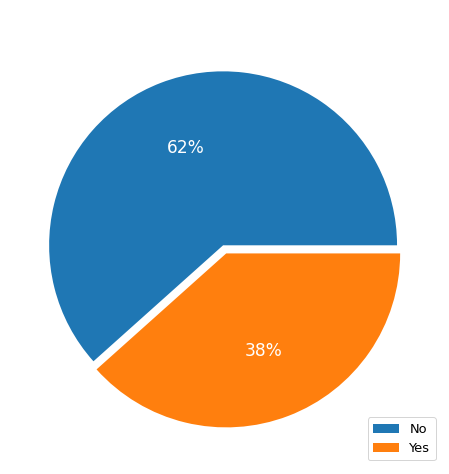

In [43]:
plt.figure(figsize = (12, 8))

plt.title('Alive Yes or No?', size = 25, fontweight = 'bold', color = 'white')

labels = 'No', 'Yes'

plt.pie(df['alive'].value_counts(), autopct = '%.0f%%', 
        textprops = {'fontsize' : 17, 'color' : 'white'}, explode = (0.025,0.025))

plt.legend(labels, loc='lower right', fontsize = 13)

plt.show()

> Terlihat dari pie chart diatas bahwa banyak penumpang yang tidak selamat lebih banyak dibandingkan dengan penumpang yang selamat.
> - Bisa kita lihat perbandingan penumpang yang selamat dan tidak selamat = 38% : 62%

In [44]:
df_new["alive"].value_counts()

no     549
yes    342
Name: alive, dtype: int64

## NUMERICAL FEATURES

> Kita mulai dengan data numerical int dan float

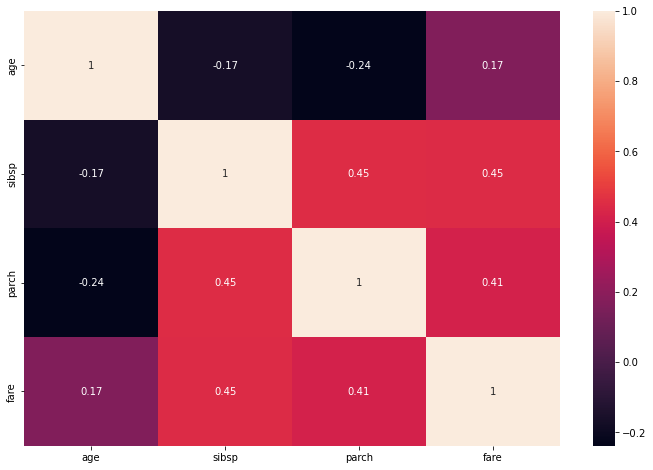

In [45]:
plt.figure(figsize = (12,8))
sns.heatmap(df_new.select_dtypes(["int64","float64"]).corr('spearman'), annot = True)
plt.show()

> Melalui heatmap diatas bisa kita lihat ada beberapa features dalam data kategori ini.
Korelasi pada heatmap diatas terlihat belum cukup signifikan, adapun korelasi tersebut yaitu **sibsp dengan parch**, **sibsp dengan fare**, **parch dengan fare**

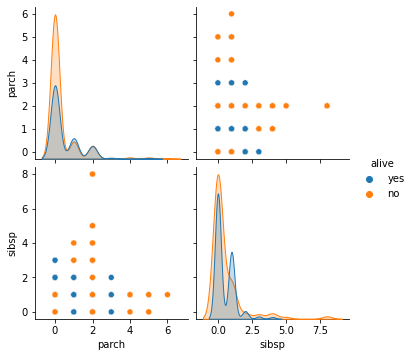

In [46]:
# parch vs sibsp
sns.pairplot(df_new[["parch", "sibsp", "alive"]], hue="alive")
plt.show()

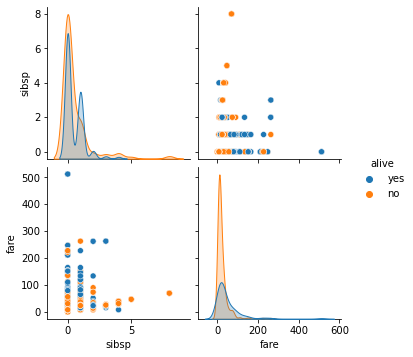

In [47]:
# sibsp vs fare
sns.pairplot(df_new[["sibsp", "fare", "alive"]], hue="alive")
plt.show()

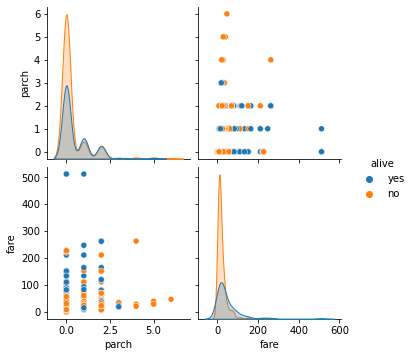

In [48]:
# parch vs fare
sns.pairplot(df_new[["parch", "fare", "alive"]], hue="alive")
plt.show()

> Dari pairplot diatas bisa kita simpulkan bahwa kebanyakan penumpang yg selamat ialah penumpang yg tidak membawa pasangan seperti orangtua, anak, kakak, adik, dll

In [49]:
df_con_new = df_new.select_dtypes(['int64', 'float64'])

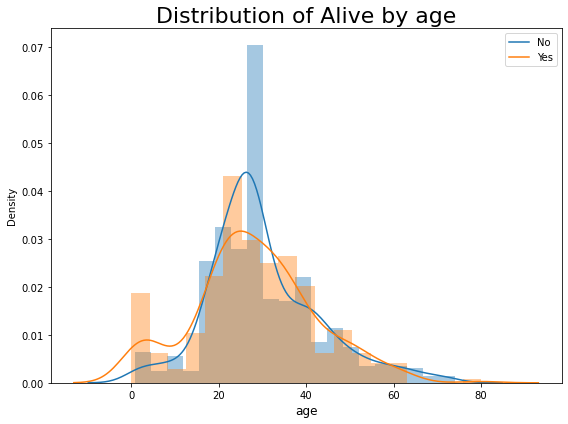

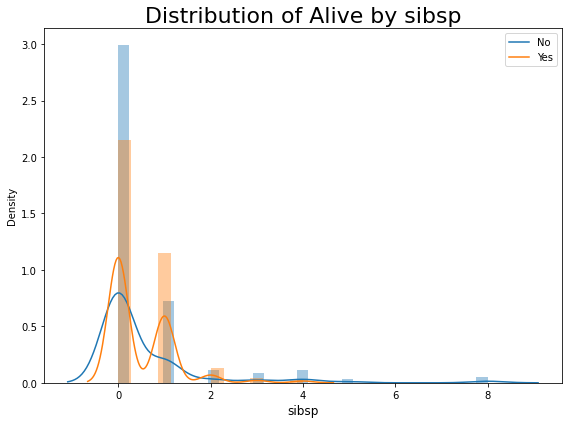

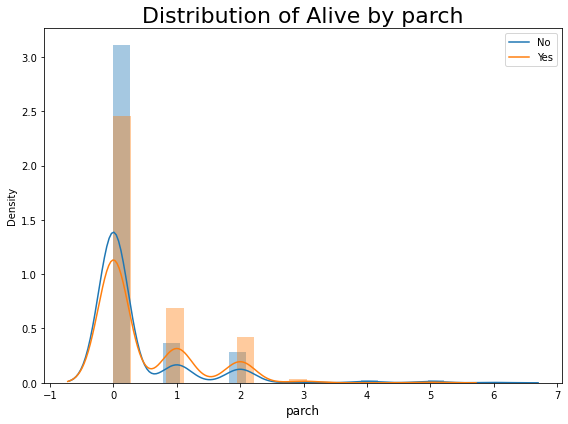

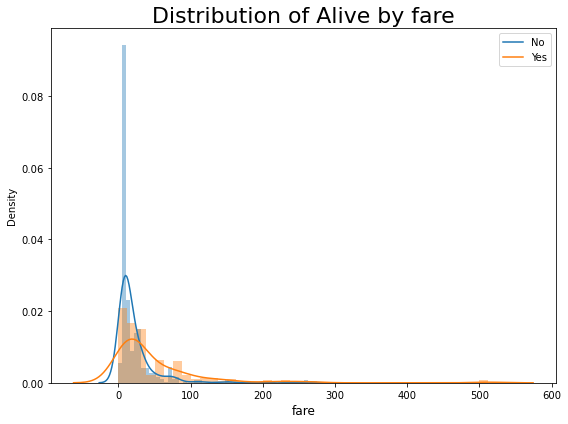

In [50]:
for i in df_con_new.columns:
    plt.figure(figsize = (8,6))
    ax = sns.distplot(df_new[(df_new['alive'] == 'no')][i])
    ax = sns.distplot(df_new[(df_new['alive'] == 'yes')][i])
    
    ax.legend(['No', 'Yes'])
    
    plt.xlabel(i, fontsize = 12)
    plt.title('Distribution of Alive by ' + i, fontsize = 22)
    
    plt.tight_layout()
    plt.show()

> kita coba kelompokkan dan fokuskan hanya pada yang alive saja.

In [51]:
con_alive = df_con_new[df_new['alive'] == 'yes']

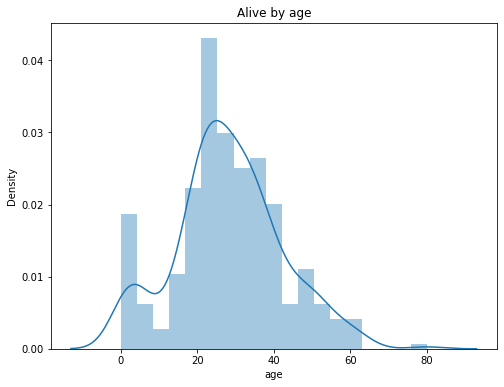

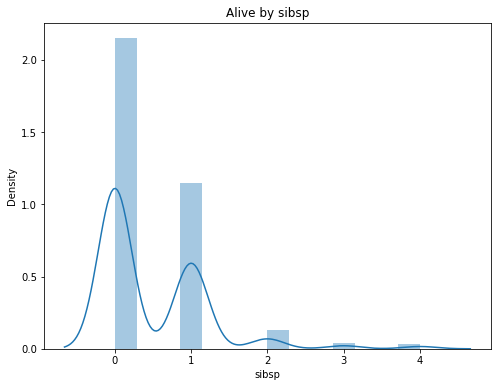

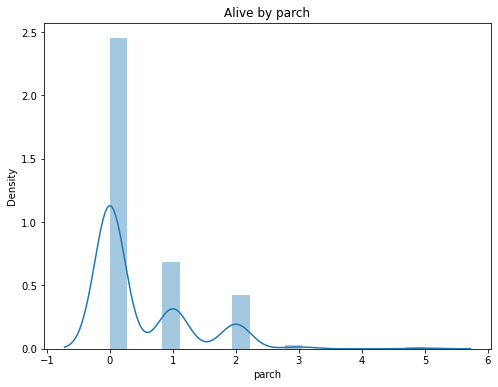

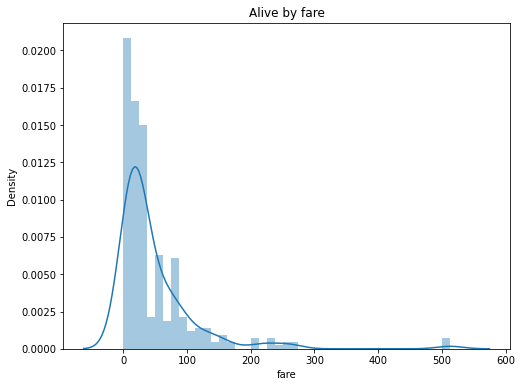

In [52]:
for i in con_alive.columns :
    plt.figure(figsize = (8,6))
    sns.distplot(con_alive[i])
    plt.title('Alive by ' + i)
    plt.show()

In [53]:
for i in con_alive.columns:
    print(con_alive[i].value_counts().head())

22    36
35    20
27    20
24    15
36    11
Name: age, dtype: int64
0    210
1    112
2     13
3      4
4      3
Name: sibsp, dtype: int64
0    233
1     65
2     40
3      3
5      1
Name: parch, dtype: int64
13.000    16
26.000    15
7.750     12
10.500     9
7.925      8
Name: fare, dtype: int64


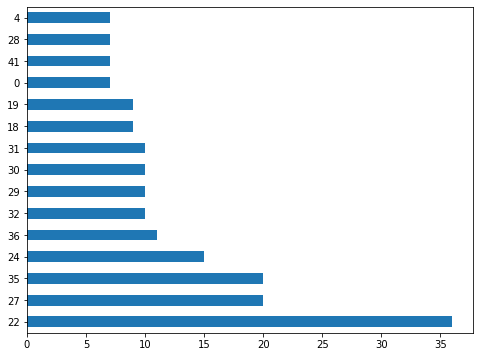

In [54]:
# visualisasi age pada alive
plt.figure(figsize = (8,6))
con_alive['age'].value_counts().sort_values(ascending = False).head(15).plot(kind = 'barh')
plt.show()

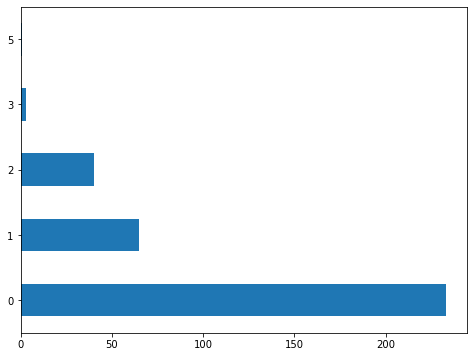

In [55]:
# visualisasi parch pada alive
plt.figure(figsize = (8,6))
con_alive['parch'].value_counts().sort_values(ascending = False).plot(kind = 'barh')
plt.show()

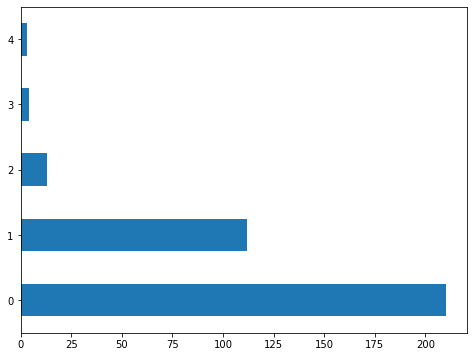

In [56]:
# visualisasi sibsp pada alive
plt.figure(figsize = (8,6))
con_alive['sibsp'].value_counts().sort_values(ascending = False).plot(kind = 'barh')
plt.show()

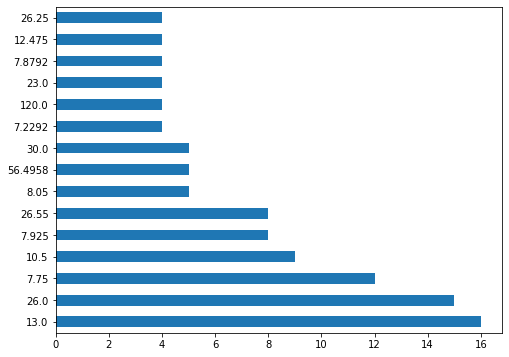

In [57]:
# visualisasi fare pada alive
plt.figure(figsize = (8,6))
con_alive['fare'].value_counts().sort_values(ascending = False).head(15).plot(kind = 'barh')
plt.show()

## SUMMARY

> Melalui eksplorasi data yang telah dilakukan, kita dapat mengetahui bahwa 
> - 38% penumpang selamat dan 62% nya tidak selamat.
> - Kebanyakan penumpang yang selamat ialah penumpang yang tidak membawa sibsp(sibling/spouse) dan parch(parent/children)
> - Penumpang yg selamat kebanyakan juga adalah orang dewasa kira kira dengan rentang umur 22 - 36 tahun
> - dengan fare 7.75 - 13.0
> - Untuk biaya/fare mungkin tidak terlalu berpengaruh terhadap rasio keselamatan

> Adapun feature yg memiliki korelasi walaupun belum signifikan yaitu : **sibsp dengan parch**, **sibsp dengan fare**, dan **parch dengan fare**

> Mungkin hanya sekian pola yg dapat saya buat melalui eksplorasi dari data Titanic ini.

> Dataframe yang sudah dibersihkan akan saya drop dibawah.

In [58]:
df_new.head()

,pclass,sex,embarked,class,who,adult_male,deck,embark_town,alive,alone,age,sibsp,parch,fare
0,1,female,Cherbourg,First,woman,False,C,Cherbourg,yes,False,38,1,0,71.2833
1,1,female,Southampton,First,woman,False,C,Southampton,yes,False,35,1,0,53.1000
2,1,male,Southampton,First,man,True,E,Southampton,no,True,54,0,0,51.8625
3,3,female,Southampton,Third,child,False,G,Southampton,yes,False,4,1,1,16.7000
4,1,female,Southampton,First,woman,False,C,Southampton,yes,True,58,0,0,26.5500


In [59]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pclass       891 non-null    object 
 1   sex          891 non-null    object 
 2   embarked     891 non-null    object 
 3   class        891 non-null    object 
 4   who          891 non-null    object 
 5   adult_male   891 non-null    object 
 6   deck         891 non-null    object 
 7   embark_town  891 non-null    object 
 8   alive        891 non-null    object 
 9   alone        891 non-null    object 
 10  age          891 non-null    int64  
 11  sibsp        891 non-null    int64  
 12  parch        891 non-null    int64  
 13  fare         891 non-null    float64
dtypes: float64(1), int64(3), object(10)
memory usage: 97.6+ KB


In [60]:
df_new.to_csv('titanic_clean.csv', index=False)